# FLIPKARK CUSTOMER REVIEW

# import libraries

In [1]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

In [2]:
text=pd.read_csv('flipkart_reviews.csv', encoding = 'latin-1')
text.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [3]:
text.tail(10)

,review,rating
9926,Very good product a problem is headphone islit...,5
9927,Awsm productREAD MORE,5
9928,delivery man was awesome.READ MORE,5
9929,The box was looking like it had opened and the...,4
9930,SuperREAD MORE,4
9931,Everything of this headset is well good such a...,4
9932,Good qualityREAD MORE,5
9933,"Amazing Bass, Good sound quality, little bit h...",5
9934,Awesome just loved itREAD MORE,5
9935,Only One word (ONE OF THE BEST HEADPHONE)READ ...,5


# check the information of each column

In [4]:
text.info()
text.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9936 entries, 0 to 9935
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9936 non-null   object
 1   rating  9936 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 155.4+ KB


,rating
count,9936.000000
mean,4.229569
std,1.148087
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
text.groupby('rating').describe()

review                              
        count unique               top freq
rating                                     
1         640    595  Not badREAD MORE    3
2         315    289       OkREAD MORE    4
3         884    771     GoodREAD MORE   24
4        2382   1893     GoodREAD MORE   87
5        5715   4365     GoodREAD MORE  136

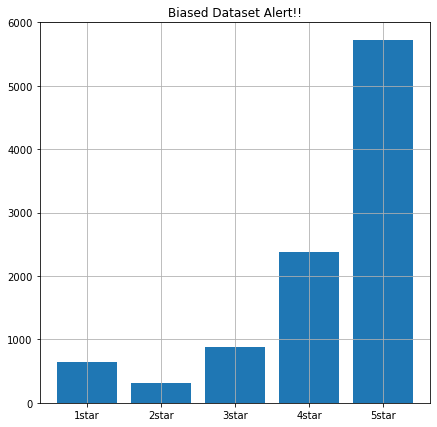

In [7]:
import matplotlib.pyplot as plt
## plotting bar graph for 
plt.figure(figsize = (7,7))
ratings = ['1star','2star','3star', '4star', '5star']
numRatings = [len(text[text['rating'] == 1 ]),
             len(text[text['rating'] == 2 ]),
             len(text[text['rating'] == 3 ]),
             len(text[text['rating'] == 4 ]),
             len(text[text['rating'] == 5 ])
             ]
plt.title('Biased Dataset Alert!!')
plt.grid(True)
plt.bar(ratings, numRatings)
plt.show()

rating for 5 star is more in the review of flipkart

# lets check with the length of the review

In [9]:
text["Length"] = text["review"].apply(len)

In [10]:
text["Length"].max()

993

In [12]:
text.head()

,review,rating,Length
0,It was nice produt. I like it's design a lot. ...,5,98
1,awesome sound....very pretty to see this nd th...,5,143
2,awesome sound quality. pros 7-8 hrs of battery...,4,499
3,I think it is such a good product not only as ...,5,405
4,Awsome sound powerful bass battery backup is a...,5,515


In [13]:
import seaborn as sns

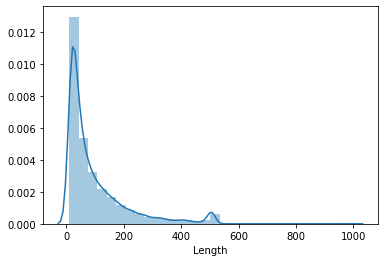

In [14]:
sns.distplot(text["Length"], bins=30)

In [15]:
text[text["Length"] == text["Length"].min()]["review"].iloc[0]

'OkREAD MORE'

# to remove punctuation

In [17]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        review = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                review.append(x)
        review = ''.join(review)
        
        return review
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        review = self.__remove_punctuation(text)
        words = self.__remove_stopwords(review)
        return words
        

In [18]:
rev = 'Sample message! Notice: it has punctuation.'
obj = PreProcessText()
words = obj.token_words(rev)
print(words)

['Sample', 'message', 'Notice', 'punctuation']


# convert string to Token 

In [19]:
text["review"].head(4).apply(obj.token_words)

0    [nice, produt, like, design, lot, easy, carry,...
1    [awesome, soundvery, pretty, see, nd, sound, q...
2    [awesome, sound, quality, pros, 78, hrs, batte...
3    [think, good, product, per, quality, also, des...
Name: review, dtype: object

# vectorization

In [20]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(text["review"])

In [21]:
messages_bow = bow_transformer.transform(text["review"])

In [22]:
print("Shape of sparese matrix {}".format(messages_bow.shape))

Shape of sparese matrix (9936, 12332)


In [23]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07258014706381627


# apply TFIDF

In [24]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [25]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Train the model

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model = MultinomialNB().fit(messages_tfidf,text["rating"])

In [31]:
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)

pred.head(10)

,0
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


In [32]:
text["rating"].head(10)

0    5
1    5
2    4
3    5
4    5
5    4
6    4
7    5
8    5
9    4
Name: rating, dtype: int64